# Exploratory Data Analysis (EDA)

## 1. About the EDA

The EDA of the `bank.csv` dataset is performed to learn more about the data and understand the dataset, determine what type of data the examined dataset is composed of, and to identify any patterns in the data.

## 2. About the Dataset

The `bank.csv` dataset is part of the Bank Marketing dataset from the UCI Machine Learning Repository. The dataset contains data related to direct marketing campaigns of a Portuguese banking institution.

The `bank.csv` dataset can be used to determine whether a bank customer will subscribe a term deposit or not, which is a binary classification problem. There are two possible outcomes: 
- `yes` - a customer will subscribe a term deposit,
- `no` - a customer will not subscribe a term deposit.

## 3. Questions

- What attributes of the `bank.csv` dataset could be more useful for predicting whether a bank customer will subscribe a term deposit or not? 
- Are specific attributes of the `bank.csv` dataset more important than others for making predictions about the success of the direct marketing campaigns?

## 4. Importing the Modules

In [1]:
# The Python modules used in this analysis are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 5. Loading the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mgrybel/CS5062/master/E-tivity_1/bank.csv')

## 6. Summarizing the Dataset

### 6.1 Dimensions of the Dataset

In [3]:
# Print the dimensions of the dataset
df.shape

(2000, 17)

We can determine that the `bank.csv` dataset has __2000__ data rows, and it contains __17__ attributes.

### 6.2 Quick Data Exploration

In [4]:
# Print the first 10 rows of the dataframe
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [5]:
# Print the last 10 rows of the dataframe
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


We can determine that the `bank.csv` dataset contains both numerical and categorical attributes. 

The last attribute `subscribed` indicates whether a customer subscribed a term deposit (`yes`) or not (`no`). This attribute would be a primary candidate for an attribute to learn to predict from the values of the other attributes. 

### 6.3 Class Distribution

The examination of the class distribution allows us to determine whether the data in the `bank.csv` dataset is balanced or not.

In [6]:
# Print the class distribution
df.groupby('subscribed').size()

subscribed
no     1000
yes    1000
dtype: int64

We can determine that each class has the same number of instances (__1000__ or __50%__ of the dataset).

### 6.4 Quick Examination of Numerical Attributes

In [7]:
# Print statistical summary of all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


By looking at the output of the describe() function, we can determine the following:
- the attribute `age` has __12__ missing values (2000 - 1988 = 12),
- the mean `age` of a bank customer is __42__,
- the mean number of contacts with a customer during this campaign (the attribute `campaign`) is __1.9__,
- the mean duration of the last call to a bank customer (the attribute `duration`) is __292__ seconds, 
- the mean number of days that passed from the call to a bank customer in a previous campaign (the attribute `pdays`) is __168__,
- the minimum value of the `pdays` attribute is __-1.000000__, meaning that there exist bank customers who have not received any calls yet (the value -1 indicates no contact),
- the mean number of contacts with a customer before this campaign (the attribute `previous`) is __2.6__.

The correlation matrix of all numerical attributes can also be examined through a __heat map__.

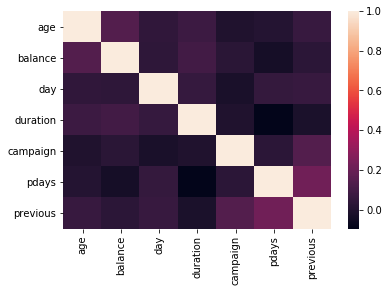

In [8]:
# correlation matrix
sns.heatmap(df.corr());

This heat map is not particularly informative. The nearest to a correlation is between the attribute `pdays` which indicates the number of days that passed from the last contact with a customer in a previous campaign, and the attribute `previous` which indicates the number of previous contacts with a customer before this campaign. This information is not particularly useful - it only indicates that some customers were contacted often previously.

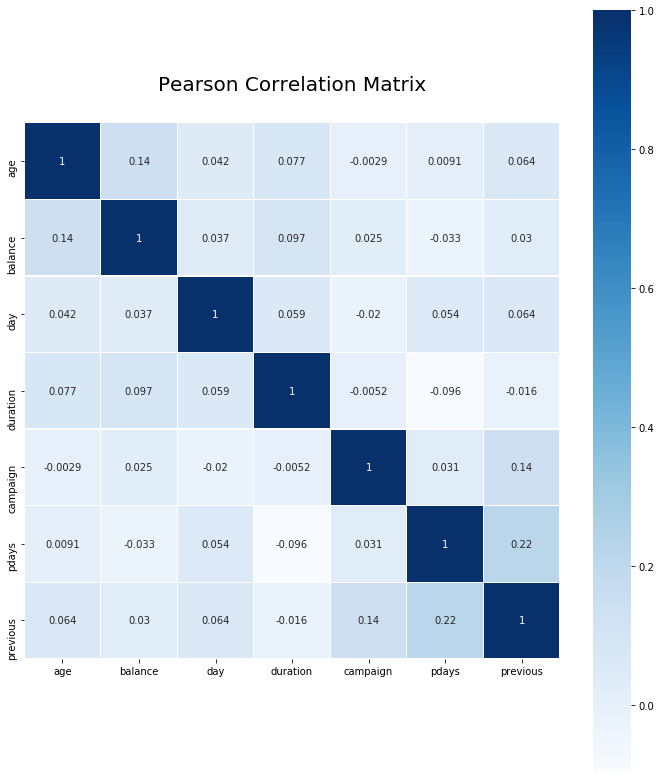

In [9]:
# Inspired by the Pearson Correlation Matrix shown at
# https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff

corr = df.corr()
f, x_axis = plt.subplots(figsize=(12,14))
cmap = sns.diverging_palette(200, 8, as_cmap=True)
_ = sns.heatmap(corr, cmap="Blues", square=True, ax=x_axis, annot=True, linewidth=0.1)
plt.title("Pearson Correlation Matrix", y=1.05, size=20)
plt.show()

Alternatively, we can use the Pearson Correlation Matrix to show the statistical relationship between the attributes of the `bank.csv` dataset. From the matrix above, we can determine that none of the combinations of the numerical attributes has a particularly high correlation (the closer to 1, the better).

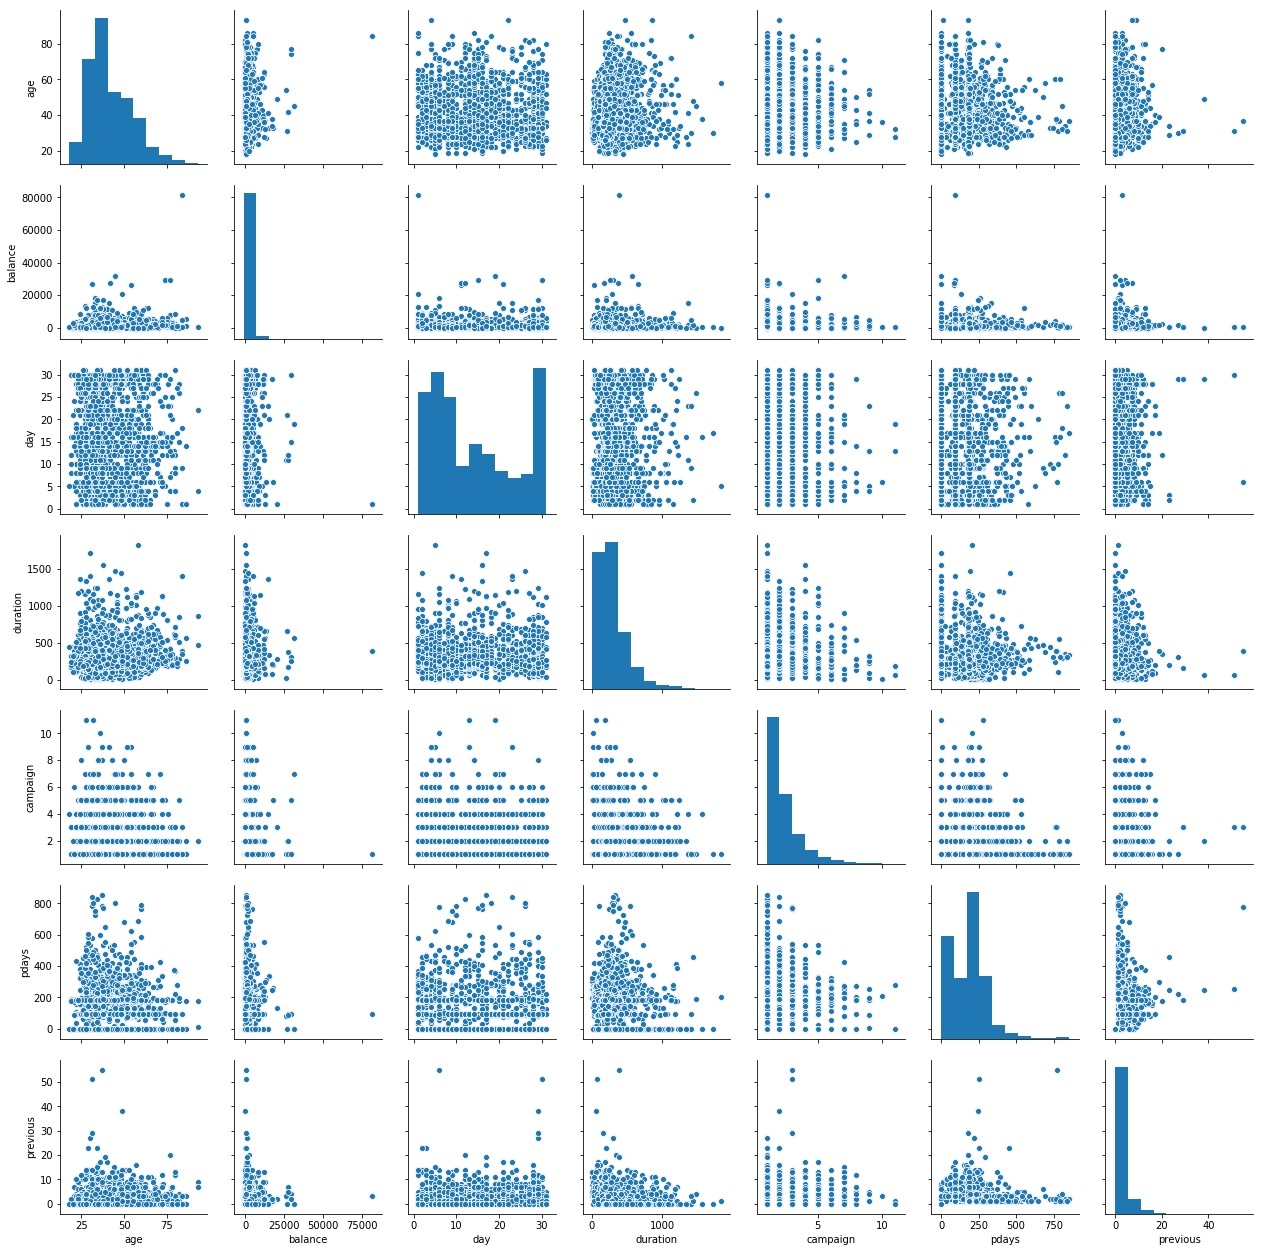

In [10]:
# by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','balance','day','duration', 'campaign', 'pdays', 'previous']].dropna())
plt.show()

Pair plots allow us to identify trends in the data which can be examined further.

### 6.5 Quick Examination of Categorical Attributes

For the categorical (non-numerical) attributes such as `job`, `marital`, `education`, `contact`, `default`, `housing`, `loan`, `month`, `poutcome` and `subscribed`, we can examine the count of each value/category to determine how well each category is represented in the dataset.

In [11]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

From the above distribution, we can determine that the customers work in various professions. Most of them have jobs as `management` (461), `technician` (348), `blue-collar` (298) or `admin` (247).

In [12]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

The majority of the customers (1111) is `married`. 674 customers are `single`, and 215 are `divorced`.

In [13]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

There are 995 customers with secondary education, 684 with tertiary education and 217 with primary education. The attribute `education` has 104 missing values.

In [14]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

A mobile phone (cellular) is a preferred method of contacting the customers (1663). The attribute `contact` has 191 missing values.

In [15]:
df['default'].value_counts()

no     1985
yes      15
Name: default, dtype: int64

1985 customers have credit in `default`, and 15 do not.

In [16]:
df['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

963 the customers took a `housing` loan, and 1037 did not.

In [17]:
df['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

250 customers took a `personal` loan, and 1750 did not.

In [18]:
df['month'].value_counts()

feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64

From the above distribution, we can determine that the customers were contacted in various months of the year. Most of them in February (404) and May (333).

In [19]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

Previous marketing campaign resulted in 444 customers subscribing a term deposit. 955 customers decided not to subscribe. The outcome for 147 customers is `other` - the documentation does not specify what this outcome means. The attribute `poutcome` has 454 missing values.

In [20]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

From the above distribution, we can determine that 1000 customers decided to subscribe a term deposit, and 1000 decided not to subscribe.

## 7. Univariate Analysis of Numerical Attributes

The univariate analysis of numerical attributes allows us to better understand each individual numerical attribute. In the univariate analysis, we take one feature at a time and examine how well it can distinguish between the two classes. In contrast, the multivariate analysis is used to better understand the relationship between attributes. 

### 7.1 The age attribute

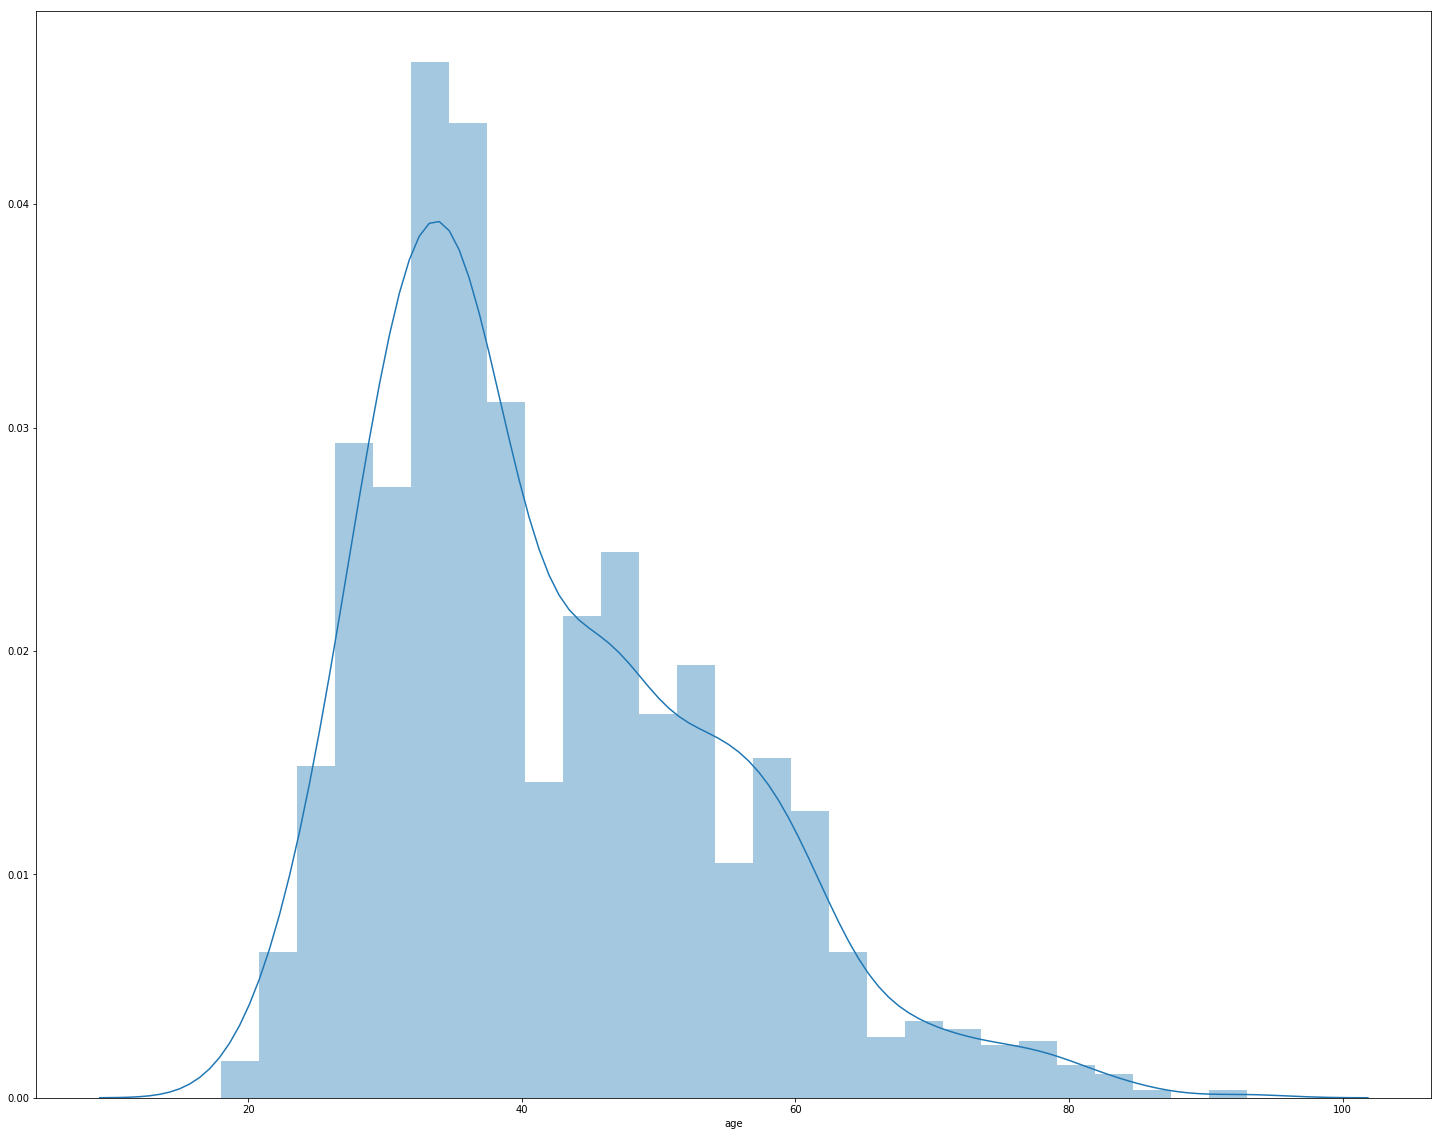

In [6]:
plt.figure(figsize=(25,20))
sns.distplot(df['age'].dropna())
plt.show()

From the above distribution, we can determine that the `age` of the majority of the customers is between 30 and 40.

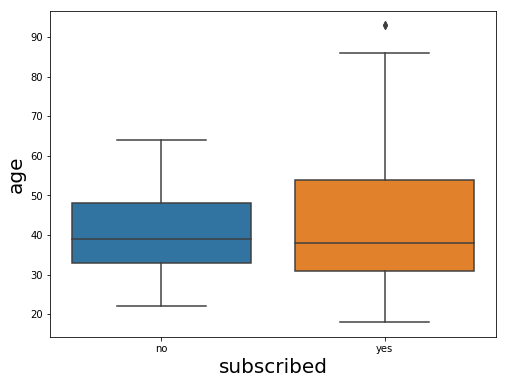

In [22]:
plt.figure(figsize=(8, 6))
plt.xlabel('subscribed', fontsize=20)
plt.ylabel('age', fontsize=20)
sns.boxplot(data=df, x='subscribed', y='age')
plt.show()

From the box plot above, we can determine that both groups of customers (those who subscribed a term deposit and those who did not) have an average age of approximately 38-40. 

At this point, we cannot clearly state that there is any correlation between the attribute `age` and the target variable.

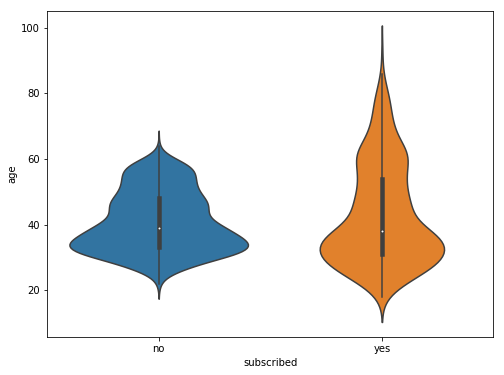

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='subscribed', y='age')
plt.show()

Alternatively, we can use violin plots to visualize the data shown in the box plots above. Both groups of customers (those who subscribed a term deposit and those who did not) have an average age of approximately 38-40.

### 7.2 The duration attribute

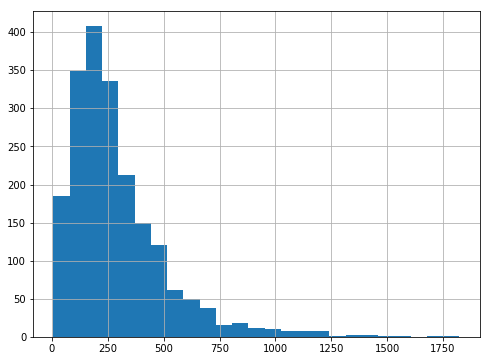

In [24]:
# A histogram of the numerical attribute duration
plt.figure(figsize=(8,6))
df['duration'].hist(bins=25)
plt.show()

From the histogram above, we can determine a power law distribution of the `duration` of the last contact in seconds, where the majority of the values is very low and very few values are very high.

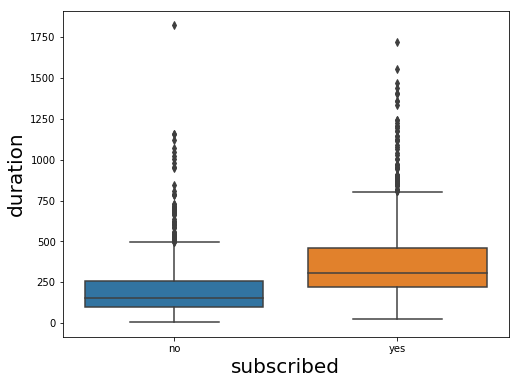

In [25]:
plt.figure(figsize=(8, 6))
plt.xlabel('subscribed', fontsize=20)
plt.ylabel('duration', fontsize=20)
sns.boxplot(data=df, x='subscribed', y='duration')
plt.show()

From the above plot, we can determine that there is a correlation between the `duration` of the last contact with a customer and the target variable. The conversation with the customers who subscribed a term deposit took longer than the conversation with the customers who did not subscribe.

### 7.3 The campaign attribute

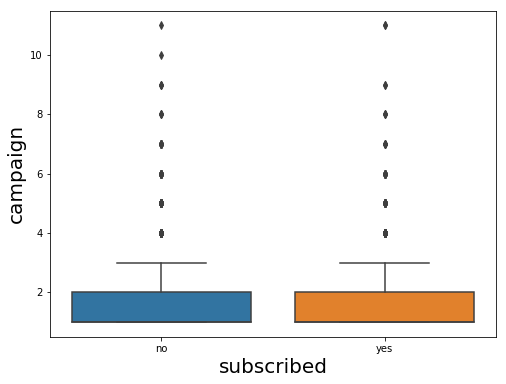

In [26]:
plt.figure(figsize=(8, 6))
plt.xlabel('subscribed', fontsize=20)
plt.ylabel('campaign', fontsize=20)
sns.boxplot(data=df, x='subscribed', y='campaign')
plt.show()

There is no correlation between the attribute `campaign` indicating the number of contacts with a customer during this campaign, and the target variable. The data for both groups of customers (those who subscribed a term deposit and those who did not) is nearly the same.

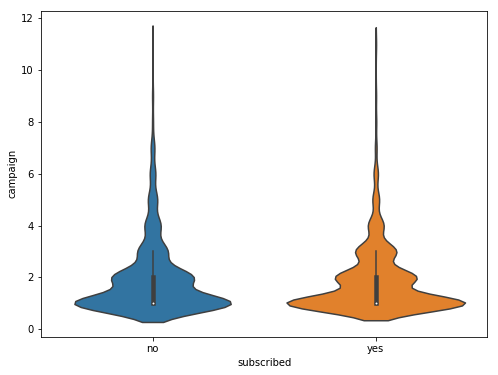

In [27]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='subscribed', y='campaign')
plt.show()

Alternatively, we can use violin plots to visualize the data shown in the box plots above. The data for both groups of customers (those who subscribed a term deposit and those who did not) is nearly the same.

### 7.4 The pdays attribute

In [28]:
df['pdays'].value_counts()

-1      454
 182     68
 181     62
 92      51
 91      41
 183     36
 184     30
 272     20
 196     19
 245     19
 252     19
 271     18
 185     18
 259     18
 253     18
 247     16
 188     16
 265     16
 266     15
 258     15
 90      14
 254     13
 180     13
 251     13
 179     13
 246     13
 274     13
 93      13
 195     13
 244     13
       ... 
 761      1
 769      1
 776      1
 551      1
 550      1
 541      1
 291      1
 321      1
 312      1
 310      1
 306      1
 304      1
 303      1
 300      1
 297      1
 295      1
 292      1
 286      1
 536      1
 285      1
 284      1
 283      1
 282      1
 281      1
 278      1
 277      1
 529      1
 532      1
 535      1
 854      1
Name: pdays, Length: 363, dtype: int64

For 454 customers, the value of the `pdays` attribute is -1, which means that 454 customers have never been contacted. 

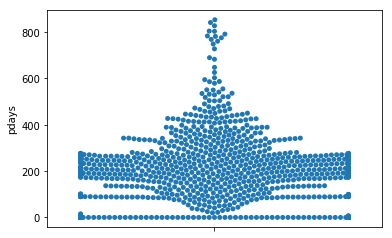

In [29]:
# Swarm plot for the pdays attribute
sns.swarmplot(x=df['pdays'], orient='v')
plt.show()

Alternatively, we can use a swarm plot to visualize the attribute `pdays`.

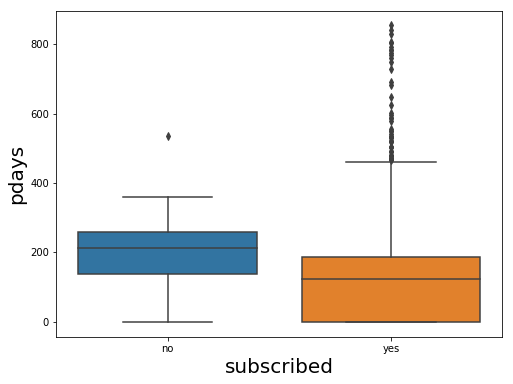

In [30]:
plt.figure(figsize=(8, 6))
plt.xlabel('subscribed', fontsize=20)
plt.ylabel('pdays', fontsize=20)
sns.boxplot(data=df, x='subscribed', y='pdays')
plt.show()

From the above plot, we can make an assumption that there is some correlation between the attribute `pdays` and the target variable because the more often the customers were contacted, the more frequently they subscribed a term deposit. 

### 7.5 The previous attribute

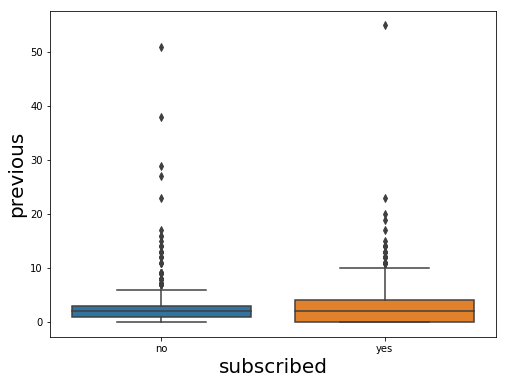

In [31]:
plt.figure(figsize=(8, 6))
plt.xlabel('subscribed', fontsize=20)
plt.ylabel('previous', fontsize=20)
sns.boxplot(data=df, x='subscribed', y='previous')
plt.show()

There is no correlation between the attribute `previous` indicating the number of contacts with a customer before this campaign, and the target variable. The data for both groups of customers (those who subscribed a term deposit and those who did not) is very similar.

## 8. Univariate Analysis of Categorical Attributes

The univariate analysis of numerical attributes allows us to better understand each individual numerical attribute. In the univariate analysis, we take one feature at a time and examine how well it can distinguish between the two classes. In contrast, the multivariate analysis is used to better understand the relationship between attributes. 

In [32]:
# define a function to draw a count plot for a single variable
def countplot(label, size_1, size_2):
    # set the size of the figure
    plt.figure(figsize=(size_1,size_2))
    Y = df[label]
    total = len(Y)*1.
    # set the size of the labels
    plt.xlabel(label, fontsize=20)
    plt.ylabel('count', fontsize=20)
    x_axis = sns.countplot(x=label, data=df)
    # display the percentage above the bars - x axis
    for counter in x_axis.patches:
        x_axis.annotate('{:.1f}%'.format(100*counter.get_height()/total), (counter.get_x()+0.1, counter.get_height()+5))
    # display the percentage - y axis
    x_axis.yaxis.set_ticks(np.linspace(0, total, 11))
    x_axis.set_yticklabels(map('{:.1f}%'.format, 100*x_axis.yaxis.get_majorticklocs()/total))
    # rotate the labels - x axis
    x_axis.set_xticklabels(x_axis.get_xticklabels(), rotation=40)
    plt.show()

In [33]:
# define a function to draw a count plot for two variables
def countplot_withY(label_1, label_2, size_1, size_2):
    # set the size of the figure
    plt.figure(figsize=(size_1,size_2))
    Y = df[label_1]
    total = len(Y)*1.
    # set the size of the labels
    plt.xlabel(label_1, fontsize=20)
    plt.ylabel('count', fontsize=20)
    x_axis = sns.countplot(x=label_1, hue=label_2, data=df)
    # display the percentage above the bars - x axis
    for counter in x_axis.patches:
        x_axis.annotate('{:.1f}%'.format(100*counter.get_height()/total), (counter.get_x()+0.1, counter.get_height()+5))
    # display the percentage - y axis
    x_axis.yaxis.set_ticks(np.linspace(0, total, 11))
    x_axis.set_yticklabels(map('{:.1f}%'.format, 100*x_axis.yaxis.get_majorticklocs()/total))
    # rotate the labels - x axis
    x_axis.set_xticklabels(x_axis.get_xticklabels(), rotation=40)
    plt.show()

### 8.1 The job attribute 

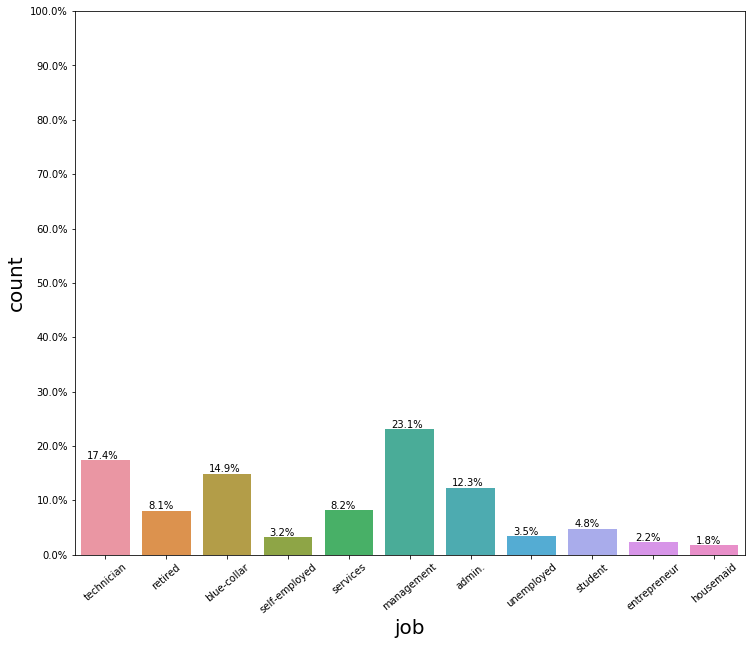

In [34]:
countplot('job', 12, 10)

From the above distribution, we can determine that the customers work in various professions. Most of them have jobs as `management` (23.1%), `technician` (17.4%), `blue-collar` (14.9%) or `admin` (12.3%).

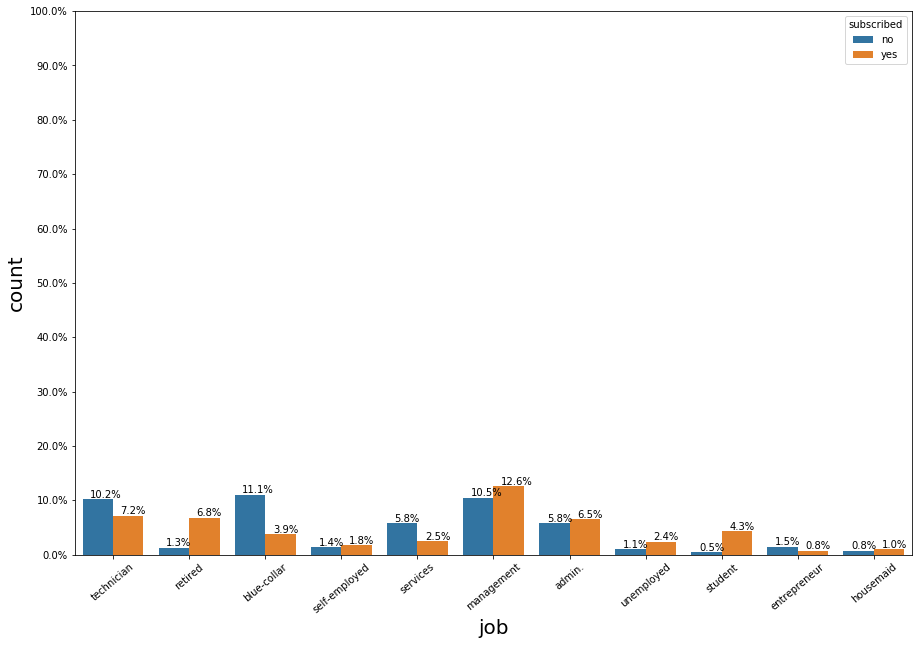

In [35]:
countplot_withY('job', 'subscribed', 15, 10)

We can calculate the ratio of subscribing and not subscribing based on the `job` attribute to determine which profession has the highest probability of subscribing given the data in the `bank` dataset. 

From the above plot, we can determine that the customers who have a `job` in management, have the highest rate of subscribing a term deposit (12.6%), but they also have one of the highest rates when it comes to not subscribing (10.5%). It is simply because there are more customers working in management than any other profession.

At this point, we cannot clearly state that there is any correlation between the attribute `job` and the target variable. 

### 8.2 The marital attribute 

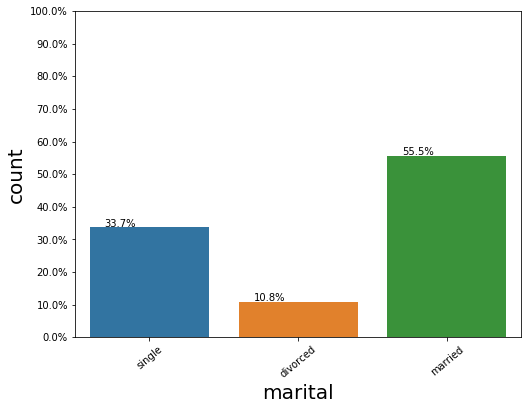

In [36]:
countplot('marital', 8, 6)

The majority of the customers (55.5%) is `married`. 33.7% of the customers are `single`, and 10.8% are `divorced`.

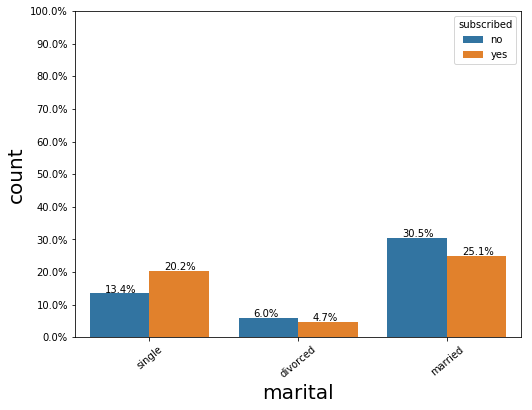

In [37]:
countplot_withY('marital', 'subscribed', 8, 6)

From the above plot, we can determine that the customers who are married, have the highest rate of subscribing a term deposit (25.1%), but they also have the highest rate when it comes to not subscribing (30.5%). It is simply because there are more married customers than those who are single or divorced.

At this point, we cannot clearly state that there is any correlation between the attribute `marital` and the target variable.

### 8.3 The education attribute

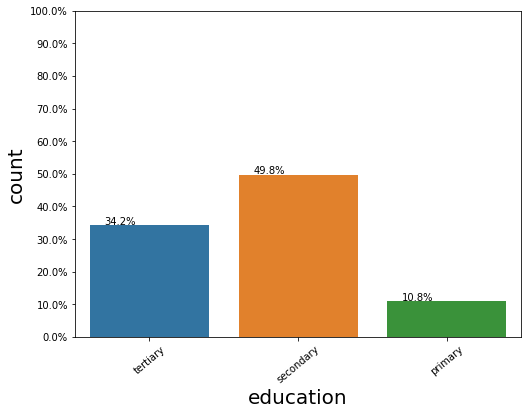

In [38]:
countplot('education', 8, 6)

There are 49.8% of customers with secondary education, 34.2% with tertiary education and 10.8% with primary education. The attribute `education` has 5.2% missing values.

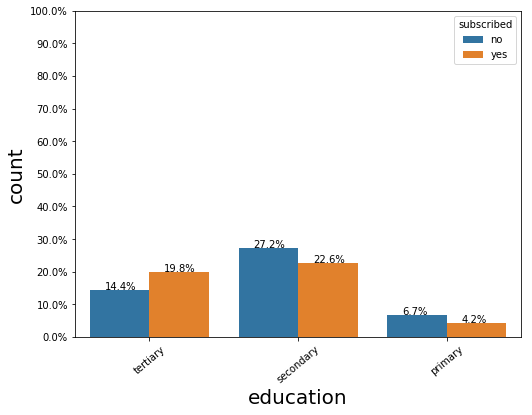

In [39]:
countplot_withY('education', 'subscribed', 8, 6)

From the above plot, we can determine that the customers with secondary education have the highest rate of subscribing a term deposit (22.6%), but they also have the highest rate when it comes to not subscribing (27.2%). It is simply because there are more customers with secondary education than those with primary and tertiary education.

At this point, we cannot clearly state that there is any correlation between the attribute `education` and the target variable.

### 8.4 The contact attribute

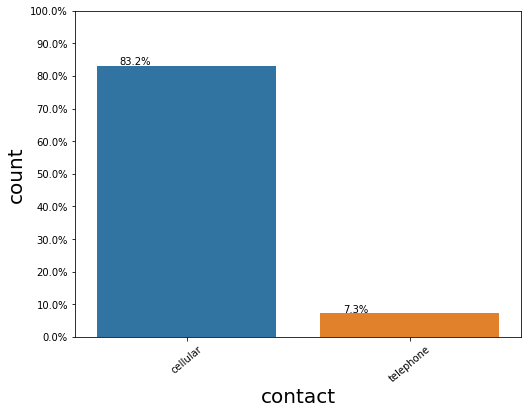

In [40]:
countplot('contact', 8, 6)

A mobile phone (cellular) is a preferred method of contacting the customers (83.2%). The attribute `contact` has 9.5% missing values.

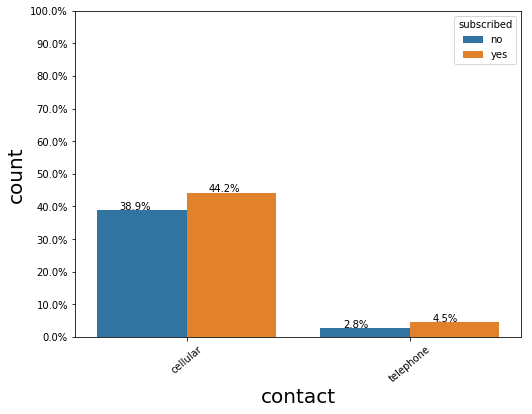

In [41]:
countplot_withY('contact', 'subscribed', 8, 6)

From the above plot, we can determine that the customers contacted via a mobile phone (cellular) have the highest rate of subscribing a term deposit (44.2%), but they also have the highest rate when it comes to not subscribing (38.9%). It is simply because a mobile phone (cellular) is a preferred method of contacting the customers.

At this point, we cannot clearly state that there is any correlation between the attribute `contact` and the target variable.

### 8.5 The default attribute

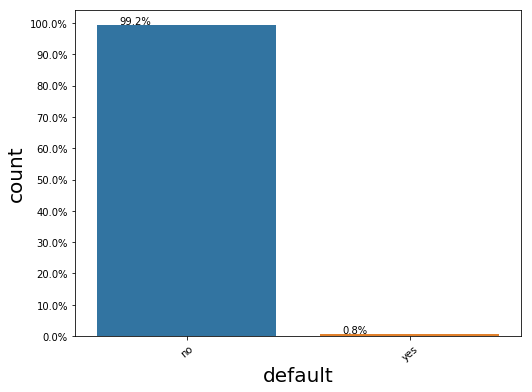

In [42]:
countplot('default', 8, 6)

99.2% of the customers don't have credit in `default`.

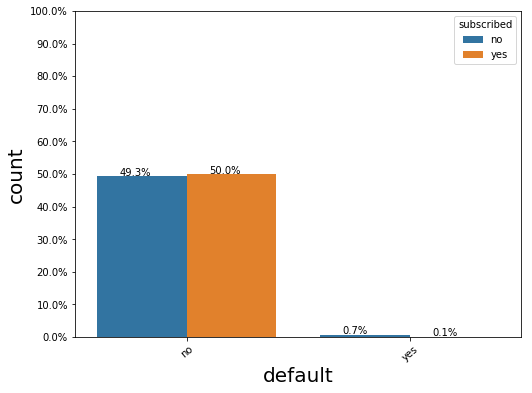

In [43]:
countplot_withY('default', 'subscribed', 8, 6)

From the above plot, we can determine that the customers who don't have credit in default, have the highest rate of subscribing a term deposit (50%), but they also have the highest rate when it comes to not subscribing (49.3%). It is simply because the majority of customers does not have credit in default.

At this point, we cannot clearly state that there is any correlation between the attribute `default` and the target variable.

### 8.6 The housing attribute

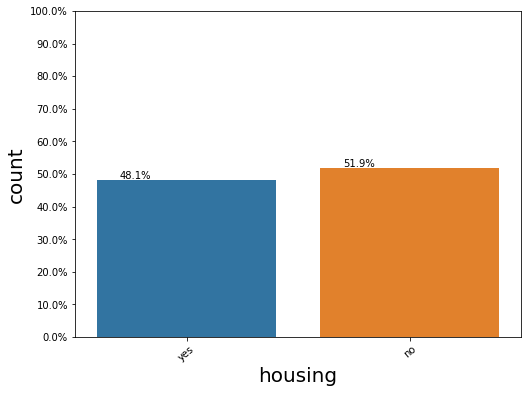

In [44]:
countplot('housing', 8, 6)

48.1% of the customers took a `housing` loan, and 51.9% did not.

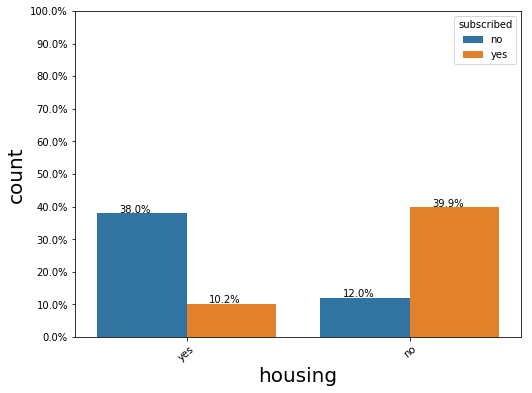

In [45]:
countplot_withY('housing', 'subscribed', 8, 6)

From the above plot, we can determine that the customers who took a housing loan, have a higher rate of subscribing a term deposit (38%) than those who did not take a housing loan (12%). From this, we can make an assumption that there is some correlation between the attribute `housing` and the target variable.

### 8.7 The loan attribute

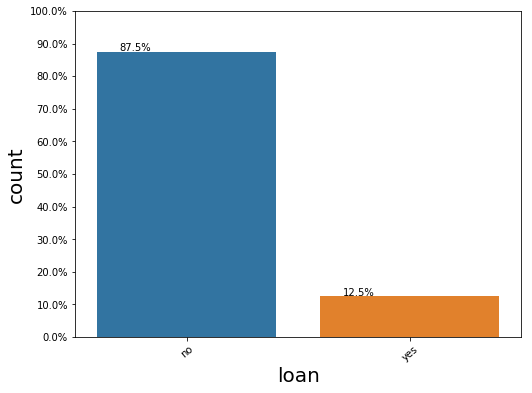

In [46]:
countplot('loan', 8, 6)

12.5% of the customers took a `personal` loan, and 87.5% did not.

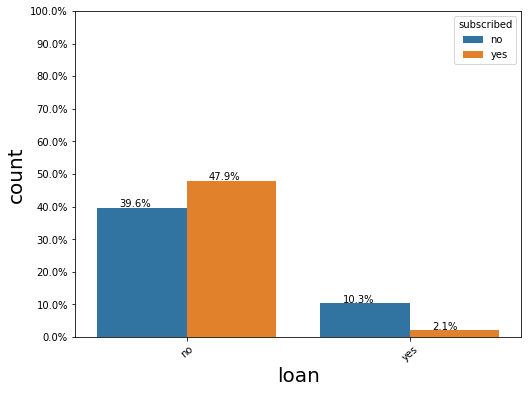

In [47]:
countplot_withY('loan', 'subscribed', 8, 6)

From the above plot, we can determine that the customers who did not take a personal loan, have the highest rate of subscribing a term deposit (47.9%), but they also have the highest rate when it comes to not subscribing (39.6%). It is simply because the majority of customers did not take a personal loan.

At this point, we cannot clearly state that there is any correlation between the attribute `loan` and the target variable.

### 8.8 The month month

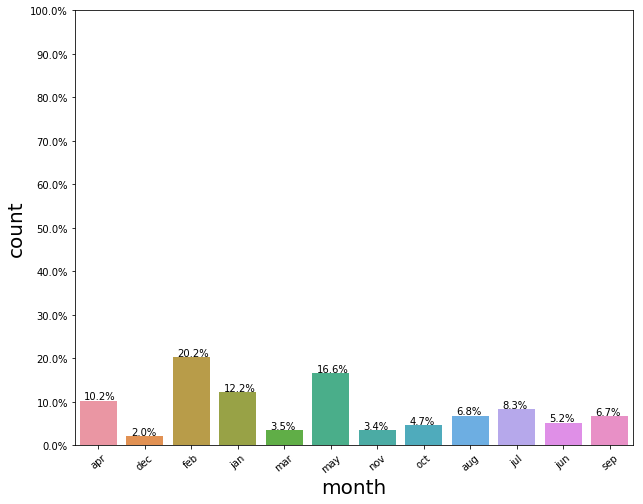

In [48]:
countplot('month', 10, 8)

From the above distribution, we can determine that the customers were contacted in various months of the year. Most of them in February (20.2%) and May (16.6%).

### 8.9 The poutcome attribute

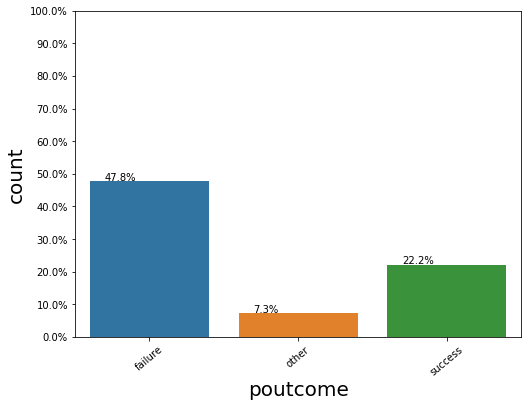

In [49]:
countplot('poutcome', 8, 6)

Previous marketing campaign resulted in 22.2% of the customers subscribing a term deposit. 47.8% of the customers decided not to subscribe. The outcome for 7.3% of the customers is other - the documentation does not specify what this outcome means. The attribute `poutcome` has 22.7% missing values.

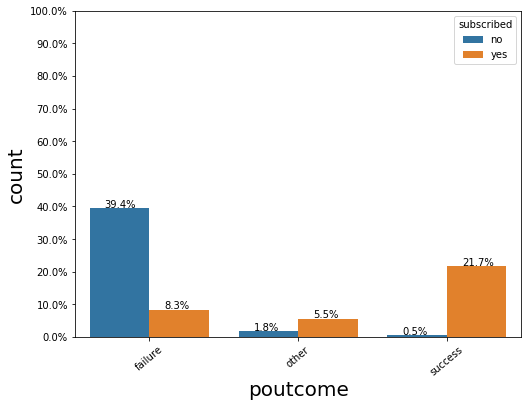

In [50]:
countplot_withY('poutcome', 'subscribed', 8, 6)

For many customers, the previous marketing campaign outcome does not exist (missing values for 22.7% and the outcome `other` for 7.3%). It means that many customers are new and have not been contacted earlier. Furthermore, the majority of the customers who had a successful outcome from the previous campaign also subscribed a term deposit. From this, we can make an assumption that there is some correlation between the attribute `poutcome` and the target variable.

## 9. Conclusions

In conclusion, we can say that out of 17 attributes of the `bank.csv` dataset, 4 attributes could be more useful for predicting whether a bank customer will subscribe a term deposit or not.

These 4 attributes are:
- `poutcome` - the majority of the customers who had a successful outcome from the previous campaign also subscribed a term deposit,
- `duration` - the conversation with the customers who subscribed a term deposit took longer than the conversation with the customers who did not subscribe,
- `pdays` - the more often the customers were contacted, the more frequently they subscribed a term deposit,
- `housing` - the customers who took a housing loan, had a higher rate of subscribing a term deposit than those who did not take a housing loan.

These 4 attributes are more important than the other 13 for making predictions about the success of the direct marketing campaigns.

## References

Brownlee, J. (2019) _Machine Learning Mastery with Python: Understand Your Data, Create Accurate Models and Work Projects End-To-End_, e-book, Independently published. 

Mani, K. (2019) _Introduction to Exploratory Data Analysis_, Medium.com, available: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff [accessed 22 Mar 2020].

McKinney, W. (2018) _Python for Data Analysis_, 2nd ed., Sebastopol: O'Reilly Media.